Normal distribution
======================
$ {\rm N}(x;\mu,\sigma^2) = \dfrac{1}{\sqrt{2\pi}\sigma}\, e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}$

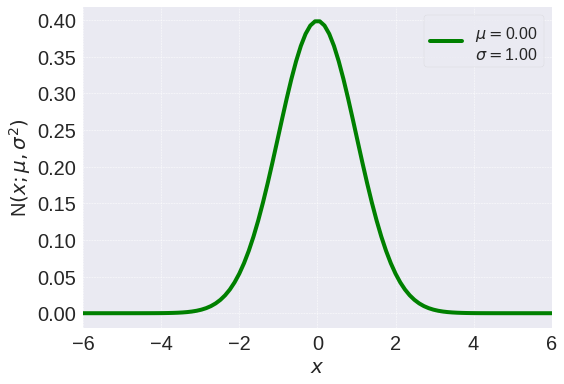

In [1]:
#@title  { run: "auto" }
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

mu = 0 #@param {type:"slider", min:-5, max:5, step:0.1}
sigma = 1 #@param {type:"slider", min:0.00, max:4, step:0.1}

xrange = 6 #@param {type:"slider", min:0, step:1}

xmin, xmax = -xrange, xrange
x = np.linspace(xmin, xmax, 100)
plt.figure()
ax = plt.axes()

label = '$\\mu=$'+"{:.2f}".format(mu)+'\n$\\sigma=$'+"{:.2f}".format(sigma)
ax.plot(x, stats.norm.pdf(x,mu,sigma), label=label,c='g', lw=4)
plt.xlim(xmin, xmax)
plt.grid(True, ls='--', lw=0.5)
plt.legend(loc="upper right", fontsize=16, frameon=True)
plt.xlabel("$x$", fontsize=20)
plt.ylabel("N$(x;\\mu,\\sigma^2)$", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

Bernoulli distribution
=======================
$ {\rm Bern}(X;p) =\left\{\begin{array}{cl}p&(X=1)\\1-p&(X=0)\end{array}\right.$

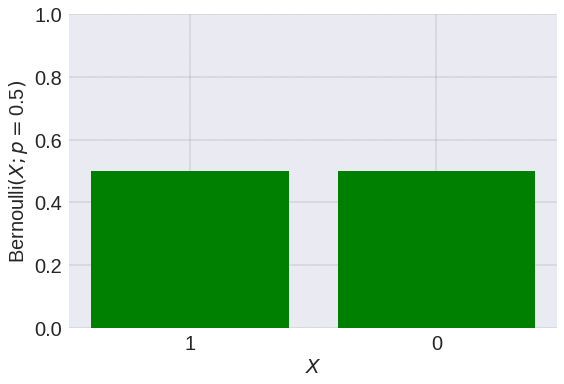

In [2]:
#@title  { run: "auto" }
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

p = 0.5 #@param {type:"slider", min:0, max:1, step:0.1}

plt.figure()
ax = plt.axes()

ax.bar([0,1], [p,1-p], tick_label=["1", "0"], align="center", color='g')
plt.ylim(0,1)
plt.grid(True, ls='--', lw=0.2, color='k')
plt.xlabel("$X$", fontsize=20)
plt.ylabel("Bernoulli$(X;p=$"+"{:.1f}".format(p)+"$)$", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

Beta distribution
===================
${\rm Beta}(p;\alpha,\beta)=\dfrac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}p^{(\alpha-1)}(1-p)^{(\beta-1)}$

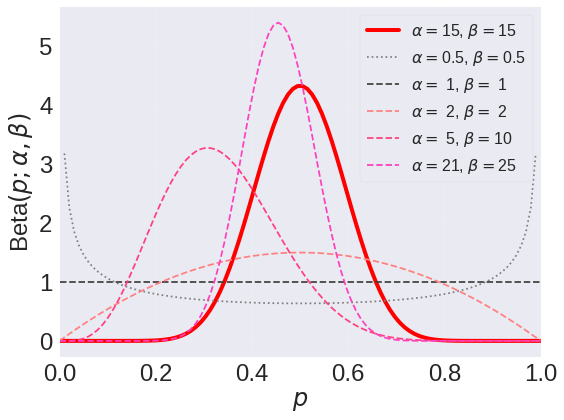

In [3]:
#@title  { run: "auto" }
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

alpha = 15 #@param {type:"slider", min:0.00, max:100, step:0.25}
beta = 15  #@param {type:"slider", min:0.00, max:100, step:0.25}

p = np.linspace(0, 1, 100)
plt.figure(figsize=(8,6))
ax = plt.axes()

label = lambda aa, bb: '$\\alpha=$'+"{:>2}".format(aa)+', $\\beta=$'+"{:>2}".format(bb)
ax.plot(p, stats.beta.pdf(p,alpha,beta), label=label(alpha,beta),c='r', lw=4)
ax.plot(p, stats.beta.pdf(p,0.5,0.5), label=label(0.5,0.5),c=[0.5,0.5,0.5], ls=':')
ax.plot(p, stats.beta.pdf(p,1,1), label=label(1,1),c=[0.25,0.25,0.25], ls='--')
ax.plot(p, stats.beta.pdf(p,2,2), label=label(2,2),c=[1,0.5,0.5], ls='--')
ax.plot(p, stats.beta.pdf(p,5,10), label=label(5,10),c=[1,0.25,0.5], ls='--')
ax.plot(p, stats.beta.pdf(p,21,25), label=label(21,25),c=[1,0.25,0.75], ls='--')
plt.xlim(0, 1)
plt.grid(True, ls='--', lw=0.2)
plt.legend(loc="upper right", fontsize=16, frameon=True)
plt.xlabel("$p$", fontsize=24)
plt.ylabel("Beta$(p;\\alpha,\\beta)$", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()

Bivariate normal distribution
=========================
${\rm N}(\mathbf{x};\mathbf{\mu},\mathbf{\Sigma})=\dfrac{1}{\sqrt{(2\pi)^m|\mathbf{\Sigma}|}}\,e^{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^\top\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})}$

$\mathbf{x}=\left[\matrix{x_1\\x_2}\right]$, $\mathbf{\mu}=\left[\matrix{\mu_1\\\mu_2}\right]$, $\mathbf{\Sigma}=\left[\matrix{s_{11}&s_{12}\\s_{21}&s_{22}}\right]$ 

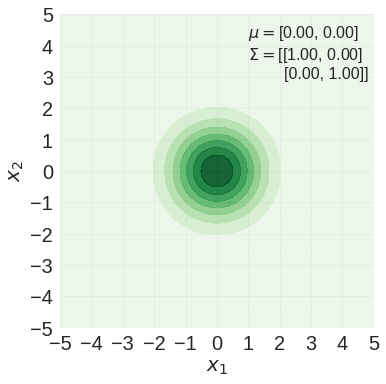

In [4]:
#@title  { run: "auto" }
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

mu1 = 0 #@param {type:"slider", min:-5, max:5, step:0.1}
mu2 = 0 #@param {type:"slider", min:-5, max:5, step:0.1}
s11 = 1 #@param {type:"slider", min:0.00, max:4, step:0.1}
s12 = 0 #@param {type:"slider", min:-4, max:4, step:0.1}
s22 = 1 #@param {type:"slider", min:0.00, max:4, step:0.1}

if s12*s12 >= s11*s22:
    print("s12*s12 must be smaller than s11*s22")
    s12 = np.sign(s12)*(s11*s22-1e-8)

xmin, xmax = -5,5
x1, x2 = np.mgrid[xmin:xmax:.01, xmin:xmax:.01]
x = np.dstack((x1, x2))

prob = stats.multivariate_normal([mu1, mu2], [[s11, s12], [s12, s22]])

plt.figure()
ax = plt.axes()

ax.contourf(x1, x2, prob.pdf(x), alpha=0.9, cmap=plt.cm.Greens)
label = '$\\mu=$['+"{:.2f}".format(mu1)+', '+"{:.2f}".format(mu2)+']\n$\\Sigma=$[['+"{:.2f}".format(s11)+', '+"{:.2f}".format(s12)+']\n        ['+"{:.2f}".format(s12)+', '+"{:.2f}".format(s22)+']]'
plt.text(1, 3, label, fontsize=16)
plt.xlim(xmin, xmax)
plt.ylim(xmin, xmax)
plt.grid(True, ls='--', lw=0.5, color='k')
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_aspect('equal')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.tight_layout()